In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

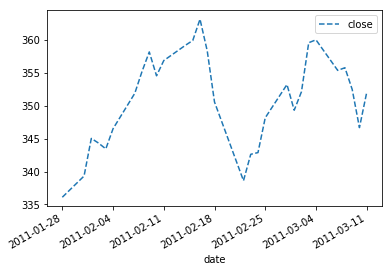

In [2]:
data = pd.read_csv('../day07/aapl.csv',header=None,usecols=[1,6],names=['date','close'])

def dmy2ymd(item):
    return '-'.join(item.split('-')[::-1])

data['date']=pd.to_datetime(data['date'].apply(dmy2ymd))
data.plot(x='date',y='close',linestyle='--')

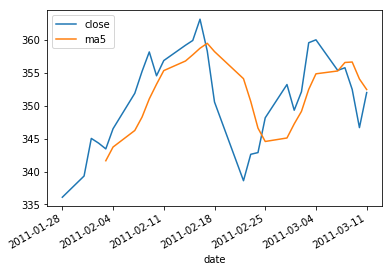

In [14]:
ma5=np.zeros(len(data)-4) #保存5日均线数据
for i in range(ma5.size):
    ma5[i]=data['close'][i:5+i].mean()
ma5=pd.Series(ma5,index=np.arange(4,30))
data['ma5']=ma5
data.plot(x='date',y=['close','ma5'])

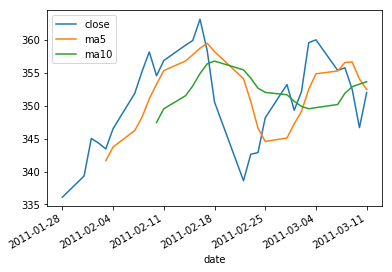

In [15]:
ma10=np.zeros(len(data)-9) #保存10日均线数据
for i in range(ma10.size):
    ma10[i]=data['close'][i:10+i].mean()
ma10 = pd.Series(ma10,index=np.arange(9,30))
data['ma10']=ma10
data.plot(x='date',y=['close','ma5','ma10'])

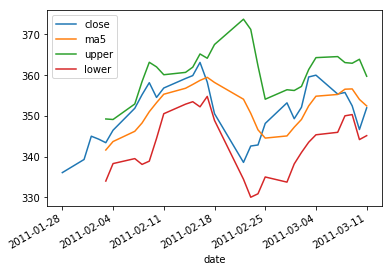

In [22]:
#布林带
std5=np.zeros(len(data)-4)
for i in range(std5.size):
    std5[i] = data['close'][i:i+5].std()
data['std5']=pd.Series(std5,index=np.arange(4,30))
data['upper']=data['ma5']+2*data['std5']
data['lower']=data['ma5']-2*data['std5']
data.plot(x='date',y=['close','ma5','upper','lower'])
plt.show()

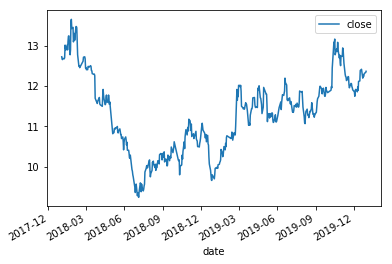

In [23]:
#基于浦发银行2年k线数据，制定策略2模型
data=pd.read_csv('pfyh.csv',header=None,usecols=[0,4,5,6],names=['date','close','ma5','ma10'])
data['date']=pd.to_datetime(data['date'])
data.plot(x='date',y='close')

In [37]:
#定义一个投资策略，遇到金叉则买入，遇到死叉则卖出
def profit(mdate):
    #计算mdate时间点，该买入，还是该卖出
    mask=data['date']<=mdate
    if mask.sum() < 2: #从第二天开始执行策略
        return 0
    today=data[mask].iloc[-1]
    yest=data[mask].iloc[-2]
    #获取昨天的5日、10日均线价格
    yes_ma5,yes_ma10=yest['ma5'],yest['ma10']
    #获取今天的5日、10日均线价格
    to_ma5,to_ma10=today['ma5'],today['ma10']
    #判断金叉、死叉
    if(yes_ma5<=yes_ma10) and (to_ma5>=to_ma10):
        return 1
    if(yes_ma5>=yes_ma10) and (to_ma5<=to_ma10):
        return -1
    return 0

profits=data['date'].apply(profit)
#声明一些变量,模拟两年间的交易过程
assets = 1000000 #现金资产
stocks=0  #股票资产
status =0 #购买状态 0 1 -1
for k,v in profits.items():
    #获取当前的交易价格
    curr_price=data.loc[k]['close']
    if v == 1 and status !=1: # 买入
        stocks=int(assets/curr_price)
        assets=assets-stocks * curr_price
        print('{}---买入操作：当前资产:{},当前股票:{}'.format(data.loc[k]['date'],assets,stocks))
        status = 1
    if v == -1 and status != -1: #卖出
        assets += stocks * curr_price
        stocks = 0
        print('{}---卖出操作：当前资产:{},当前股票:{}'.format(data.loc[k]['date'],assets,stocks))
        status = -1

2018-01-04 00:00:00---买入操作：当前资产:11.92000000004191,当前股票:78988
2018-02-02 00:00:00---卖出操作：当前资产:1037914.2400000001,当前股票:0
2018-02-07 00:00:00---买入操作：当前资产:4.640000000130385,当前股票:77168
2018-02-12 00:00:00---卖出操作：当前资产:964604.6400000001,当前股票:0
2018-03-01 00:00:00---买入操作：当前资产:1.2800000000279397,当前股票:77416
2018-03-02 00:00:00---卖出操作：当前资产:960733.8400000001,当前股票:0
2018-03-12 00:00:00---买入操作：当前资产:3.3700000001117587,当前股票:76797
2018-03-15 00:00:00---卖出操作：当前资产:950750.2300000002,当前股票:0
2018-04-10 00:00:00---买入操作：当前资产:1.270000000251457,当前股票:80846
2018-04-19 00:00:00---卖出操作：当前资产:952367.1500000003,当前股票:0
2018-04-24 00:00:00---买入操作：当前资产:1.270000000251457,当前股票:80846
2018-04-26 00:00:00---卖出操作：当前资产:933772.5700000003,当前股票:0
2018-05-15 00:00:00---买入操作：当前资产:4.570000000298023,当前股票:84888
2018-05-18 00:00:00---卖出操作：当前资产:924434.8900000004,当前股票:0
2018-06-07 00:00:00---买入操作：当前资产:6.810000000405125,当前股票:87128
2018-06-08 00:00:00---卖出操作：当前资产:907009.2900000004,当前股票:0
2018-07-10 00:00:00---买入操作：当前资产:2.9700000003213063,当前

In [32]:
profits

0      0
1      0
2      1
3      0
4      0
      ..
482    0
483   -1
484    0
485    0
486    0
Name: date, Length: 487, dtype: int64

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


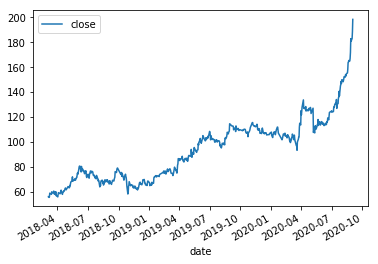

In [43]:
import tushare as ts
data=ts.get_hist_data('603288')
data=data[['close','ma5','ma10']]
data=data.sort_index()  #索引排序
data=data.reset_index() #重置索引
data['date']=pd.to_datetime(data['date'])
data.plot(x='date',y='close')